
The mathematical model can be stated as:

**Variables:**
\( x_i \): A binary variable indicating whether item `i` is selected (1 if selected, 0 otherwise).

**Objective:**
\[ \text{max} \sum_{i=1}^{n} c_i x_i \]

**Constraints:**
\[ \sum_{i=1}^{n} w_i x_i \leq W \]
\[ x_i \in \{0,1\} \]




The mathematical model can be stated as:

**Variables:**  
$ x_i $: A binary variable indicating whether item \(i\) is selected (1 if selected, 0 otherwise).

**Objective:**  
\begin{equation}
\text{max} \sum_{i=1}^{n} c_i x_i 
\end{equation}

**Constraints:**  
1. \begin{equation}
\sum_{i=1}^{n} w_i x_i \leq W 
\end{equation}
2.\begin{equation} x_i \in \{0,1\}\end{equation}


In [10]:

from gurobipy import Model, GRB

# Sample data for 7 items
costs = [10, 20, 30, 40, 50, 60, 70]
weights = [5, 10, 15, 20, 25, 30, 35]
W = 50  # Maximum weight capacity

# Create the model
m = Model("knapsack")

# Create variables
x = m.addVars(len(costs), vtype=GRB.BINARY, name="x")

# Set the objective function
m.setObjective(sum(costs[i] * x[i] for i in range(len(costs))), GRB.MAXIMIZE)

# Add capacity constraint
m.addConstr(sum(weights[i] * x[i] for i in range(len(costs))) <= W, "capacity")

# Solve the problem
m.optimize()

# Print the solution
for i in range(len(costs)):
    if x[i].X > 0.5:
        print(f"Item {i+1} is selected with cost {costs[i]} and weight {weights[i]}")



Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1 rows, 7 columns and 7 nonzeros
Model fingerprint: 0xe3168763
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [5e+00, 4e+01]
  Objective range  [1e+01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+01, 5e+01]
Found heuristic solution: objective 100.0000000
Presolve removed 1 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 100 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+02, best bound 1.000000000000e+02, gap 0.0000%
Item 1 is selected with cost 10 and weight 5
Item 2 is selected with cost 20 and weight 10
Item 3 is selected with cost 30 and weight 15
Item 4 is sel

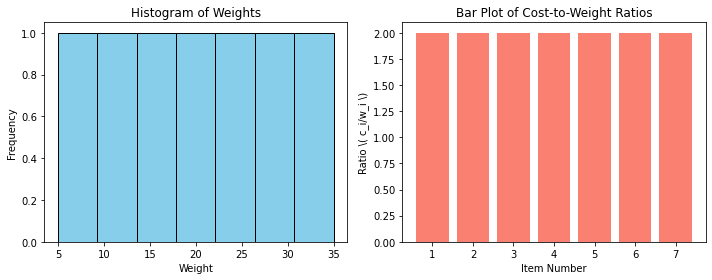

In [11]:
import matplotlib.pyplot as plt

# Sample data for 7 items
costs = [10, 20, 30, 40, 50, 60, 70]
weights = [5, 10, 15, 20, 25, 30, 35]
ratios = [c/w for c, w in zip(costs, weights)]

# Create a histogram of the weights
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(weights, bins=7, color='skyblue', edgecolor='black')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Create a bar plot of the ratios c_i/w_i
plt.subplot(1, 2, 2)
plt.bar(range(1, len(costs)+1), ratios, color='salmon')
plt.title('Bar Plot of Cost-to-Weight Ratios')
plt.xlabel('Item Number')
plt.ylabel('Ratio \( c_i/w_i \)')

plt.tight_layout()
plt.show()

In [12]:
# Create the binary knapsack model
m_binary = Model("knapsack_binary")
x_binary = m_binary.addVars(len(costs), vtype=GRB.BINARY, name="x_binary")
m_binary.setObjective(sum(costs[i] * x_binary[i] for i in range(len(costs))), GRB.MAXIMIZE)
m_binary.addConstr(sum(weights[i] * x_binary[i] for i in range(len(costs))) <= W, "capacity")
m_binary.optimize()

# Create the LP relaxation knapsack model
m_lp = Model("knapsack_lp")
x_lp = m_lp.addVars(len(costs), vtype=GRB.CONTINUOUS, name="x_lp", lb=0, ub=1)
m_lp.setObjective(sum(costs[i] * x_lp[i] for i in range(len(costs))), GRB.MAXIMIZE)
m_lp.addConstr(sum(weights[i] * x_lp[i] for i in range(len(costs))) <= W, "capacity")
m_lp.optimize()

# Compare the solutions
print("\nBinary Solution:")
for i in range(len(costs)):
    if x_binary[i].X > 0.5:
        print(f"Item {i+1} is selected with fraction {x_binary[i].X:.2f}")

print("\nLP Relaxation Solution:")
for i in range(len(costs)):
    if x_lp[i].X > 1e-6:
        print(f"Item {i+1} is selected with fraction {x_lp[i].X:.2f}")

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1 rows, 7 columns and 7 nonzeros
Model fingerprint: 0xe3168763
Variable types: 0 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [5e+00, 4e+01]
  Objective range  [1e+01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+01, 5e+01]
Found heuristic solution: objective 100.0000000
Presolve removed 1 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 100 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+02, best bound 1.000000000000e+02, gap 0.0000%
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a m

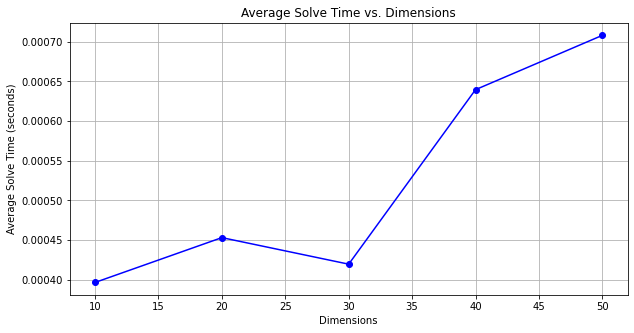

In [13]:
from gurobipy import Model, GRB
import matplotlib.pyplot as plt
import random
import time

def random_knapsack_instance(n):
    """Generate a random knapsack instance with n items."""
    costs = [random.randint(1, 10) for _ in range(n)]
    weights = [random.randint(1, 10) for _ in range(n)]
    W = sum(weights) // 2
    return costs, weights, W

def solve_binary_knapsack(costs, weights, W):
    """Solve the binary knapsack problem and return the solve time."""
    m = Model("knapsack_binary")
    m.setParam('OutputFlag', 0)  # suppress output
    x = m.addVars(len(costs), vtype=GRB.BINARY)
    m.setObjective(sum(costs[i] * x[i] for i in range(len(costs))), GRB.MAXIMIZE)
    m.addConstr(sum(weights[i] * x[i] for i in range(len(costs))) <= W)

    start_time = time.time()
    m.optimize()
    end_time = time.time()

    return end_time - start_time

# Parameters
dimensions = [10, 20, 30, 40, 50]
num_instances = 10

average_times = []

# For each dimension, solve num_instances instances and compute the average solve time
for n in dimensions:
    total_time = 0
    for _ in range(num_instances):
        costs, weights, W = random_knapsack_instance(n)
        solve_time = solve_binary_knapsack(costs, weights, W)
        total_time += solve_time
    avg_time = total_time / num_instances
    average_times.append(avg_time)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(dimensions, average_times, marker='o', linestyle='-', color='b')
plt.xlabel('Dimensions')
plt.ylabel('Average Solve Time (seconds)')
plt.title('Average Solve Time vs. Dimensions')
plt.grid(True)
plt.show()

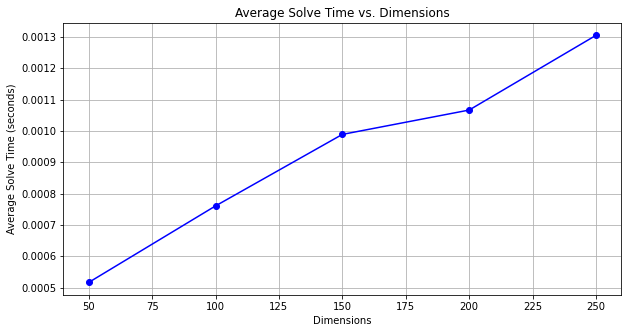

In [6]:
from gurobipy import Model, GRB
import matplotlib.pyplot as plt
import random
import time

def random_knapsack_instance(n):
    """Generate a random knapsack instance with n items."""
    costs = [random.randint(1, 10) for _ in range(n)]
    weights = [random.randint(1, 10) for _ in range(n)]
    W = sum(weights) // 2
    return costs, weights, W

def solve_binary_knapsack(costs, weights, W):
    """Solve the binary knapsack problem and return the solve time."""
    m = Model("knapsack_binary")
    m.setParam('OutputFlag', 0)  # suppress output
    x = m.addVars(len(costs), vtype=GRB.BINARY)
    m.setObjective(sum(costs[i] * x[i] for i in range(len(costs))), GRB.MAXIMIZE)
    m.addConstr(sum(weights[i] * x[i] for i in range(len(costs))) <= W)

    start_time = time.time()
    m.optimize()
    end_time = time.time()

    return end_time - start_time

# Updated Parameters
dimensions = [50, 100, 150, 200, 250]
num_instances = 20

average_times = []

# For each dimension, solve num_instances instances and compute the average solve time
for n in dimensions:
    total_time = 0
    for _ in range(num_instances):
        costs, weights, W = random_knapsack_instance(n)
        solve_time = solve_binary_knapsack(costs, weights, W)
        total_time += solve_time
    avg_time = total_time / num_instances
    average_times.append(avg_time)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(dimensions, average_times, marker='o', linestyle='-', color='b')
plt.xlabel('Dimensions')
plt.ylabel('Average Solve Time (seconds)')
plt.title('Average Solve Time vs. Dimensions')
plt.grid(True)
plt.show()


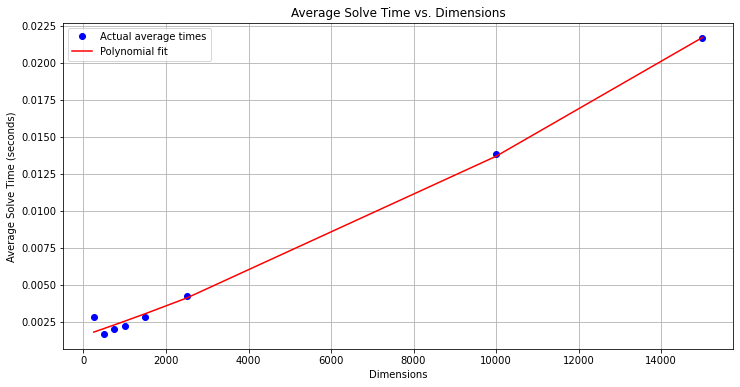

Polynomial fit coefficients: [2.61909775e-11 9.50865456e-07 1.55578657e-03]


In [9]:
from gurobipy import Model, GRB
import matplotlib.pyplot as plt
import numpy as np
import random
import time

def random_knapsack_instance(n):
    """Generate a random knapsack instance with n items."""
    costs = [random.randint(1, 10) for _ in range(n)]
    weights = [random.randint(1, 10) for _ in range(n)]
    W = sum(weights) // 2
    return costs, weights, W

def solve_binary_knapsack(costs, weights, W):
    """Solve the binary knapsack problem and return the solve time."""
    m = Model("knapsack_binary")
    m.setParam('OutputFlag', 0)  # suppress output
    x = m.addVars(len(costs), vtype=GRB.BINARY)
    m.setObjective(sum(costs[i] * x[i] for i in range(len(costs))), GRB.MAXIMIZE)
    m.addConstr(sum(weights[i] * x[i] for i in range(len(costs))) <= W)

    start_time = time.time()
    m.optimize()
    end_time = time.time()

    return end_time - start_time

# Updated Parameters
dimensions = [250, 500, 750, 1000, 1500, 2500, 10000, 15000]
num_instances = 20

average_times = []

# For each dimension, solve num_instances instances and compute the average solve time
for n in dimensions:
    total_time = 0
    for _ in range(num_instances):
        costs, weights, W = random_knapsack_instance(n)
        solve_time = solve_binary_knapsack(costs, weights, W)
        total_time += solve_time
    avg_time = total_time / num_instances
    average_times.append(avg_time)

# Fit a polynomial curve to the average solve times
coefficients = np.polyfit(dimensions, average_times, 2)
polynomial = np.poly1d(coefficients)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(dimensions, average_times, 'bo', label="Actual average times")
plt.plot(dimensions, polynomial(dimensions), 'r-', label="Polynomial fit")
plt.xlabel('Dimensions')
plt.ylabel('Average Solve Time (seconds)')
plt.title('Average Solve Time vs. Dimensions')
plt.legend()
plt.grid(True)
plt.show()

print(f"Polynomial fit coefficients: {coefficients}")
